# Life Expectancy Predictors
## Tanner Young
### https://github.com/TannerYoung13/capstone-young

Importing the CSV file and required programs.

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'
data = pd.read_csv(file_path)

# Print the column names to identify the correct column name for life expectancy
print(data.columns)

# Convert specific columns to appropriate data types
data['Year'] = data['Year'].astype(int)
data['Life expectancy '] = data['Life expectancy '].astype(float)

# Identify and handle outliers using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)

# Fill missing values only for numeric columns with their column means
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Standardize numerical columns
scaler = StandardScaler()
data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Standardize categorical data
data['Status'] = data['Status'].str.strip().str.capitalize()

# Check for and remove duplicate records
data = data.drop_duplicates()

# Save the cleaned data to a new CSV file
output_file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data_Cleaned.csv'
data.to_csv(output_file_path, index=False)



Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Data Information

In [27]:
file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

Descriptive Statistics

In [28]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000       0.000000   
25%       0.810000               37.438577    74.000000       0.000000   
50%       3.790000              145.102253    89.000000      15.000000   
75%       7.340000              509.389994    96.000000     373.000000   
max      17.870000            18961.348600    99.000000  131441.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1649.000000         1649.000000  1649.000000        1649.000000   
mean     38.128623           44.220133    83.564585           5.955925   
std      19.754249          162.897999    22.450557           2.299385   
min       2.000000            0.000000     3.000000           0.740000   
25%      19.500000            1.000000    81.000000           4.410000   
50%      43.700000            4.000000    93.000000           5.840000   
75%      55.800000           29.000000    97.000000           7.470000   
max      77.100000         2100.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1649.000000  1649.000000    1649.000000  1.649000e+03   
mean     84.155246     1.983869    5566.031887  1.465363e+07   
std      21.579193     6.032360   11475.900117  7.046039e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      82.000000     0.100000     462.149650  1.918970e+05   
50%      92.000000     0.100000    1592.572182  1.419631e+06   
75%      97.000000     0.700000    4718.512910  7.658972e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1649.000000          1649.000000   
mean                4.850637             4.907762   
std                 4.599228             4.653757   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.000000             3.200000   
75%                 7.100000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1649.000000  1649.000000  
mean                          0.631551    12.119891  
std                           0.183089     2.795388  
min                           0.000000     4.200000  
25%                           0.509000    10.300000  
50%                           0.673000    12.300000  
75%                           0.751000    14.000000  
max                           0.936000    20.700000

A sample of data and attributes.

In [30]:
data.sample(20)

Country  Year      Status  Life expectancy   Adult Mortality  \
481   Equatorial Guinea  2014  Developing              57.9               32   
1135             Panama  2013  Developing              77.5              118   
605              Greece  2003  Developing              79.1               81   
549               Gabon  2006  Developing              61.4              288   
624              Guinea  2009  Developing              57.3              297   
653            Honduras  2010  Developing              73.6              156   
573             Germany  2007   Developed              79.8               82   
1412           Suriname  2005  Developing              68.9               25   
379             Comoros  2013  Developing              62.9              233   
295            Cambodia  2014  Developing              68.3              179   
474         El Salvador  2006  Developing              75.0              211   
43               Angola  2014  Developing              51.7              348   
1110              Niger  2010  Developing              58.2              252   
174              Belize  2003  Developing              68.4               21   
288          Cabo Verde  2008  Developing              72.4              124   
1547       Turkmenistan  2007  Developing              64.1              241   
451             Ecuador  2014  Developing              76.0              121   
629       Guinea-Bissau  2012  Developing              57.6              285   
1044         Mozambique  2014  Developing              56.7              375   
180               Benin  2012  Developing              59.3              251   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
481               3     0.01               13.404774            2        13   
1135              1     6.89             1694.467075            8         0   
605               0     9.46             2124.921517           92         0   
549               2     8.01               40.537198           52        90   
624              29     0.18               24.847636           57       264   
653               4     3.10              302.105751           97         0   
573               3    11.50             7777.556353           86       567   
1412              0     4.47              418.920661           83         0   
379               1     0.01               61.574436           88         0   
295              11     0.01               12.179521           88         0   
474               3     2.77               57.745626           96         0   
43               67     8.33               23.965612           64     11699   
1110             50     0.12                5.883761            7       372   
174               0     5.67              312.799595           96         0   
288               0     4.16              360.620882           98         0   
1547              6     2.58                0.358651           98        59   
451               6     3.82               79.116263           83         0   
629               4     0.01                0.948526           87         0   
1044             61     0.01               54.911595           79         9   
180              25     0.01                9.804075            8       288   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  \
481   ...     24               3.80            2        4.4    192.597330   
1135  ...     81               8.90            8        0.1  11685.979830   
605   ...     93               8.61           94        0.1  18477.578410   
549   ...     44               2.88           45       10.7    727.777345   
624   ...      6               3.85           57        2.3    436.689554   
653   ...     97               8.45           97        0.4   1932.858290   
573   ...     95               1.18           96        0.1  41814.819100   
1412  ...     84               6.78           83        0.6

Defining the columns names.

In [37]:
data.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [41]:
data["Life expectancy"].nunique()


320

Data Distribution Visualization

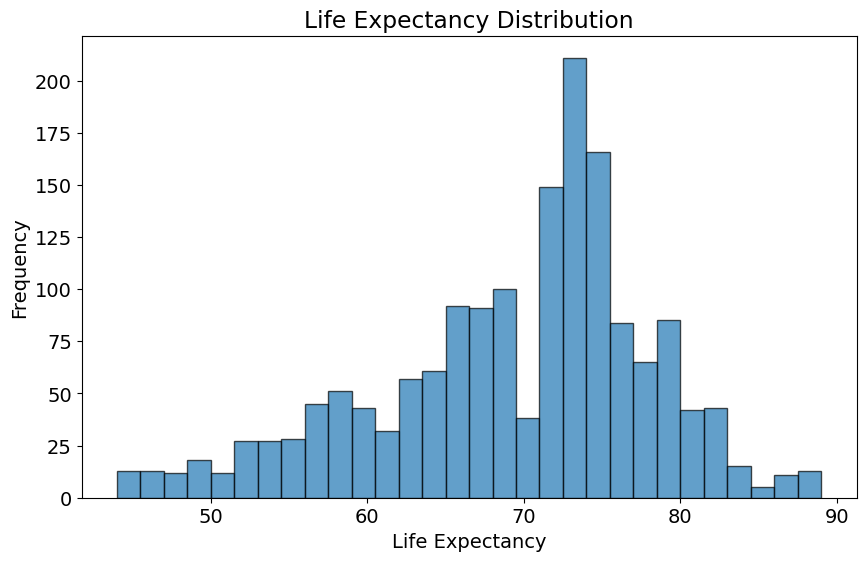

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings and set display options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rc('font', size=14)

# Update the file path to the location where your CSV file is stored
file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Ensure you are selecting the correct column for life expectancy
life_expectancy_column = 'Life expectancy '

# Plot the histogram for life expectancy
plt.figure(figsize=(10, 6))
plt.hist(data[life_expectancy_column], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Life Expectancy Distribution")
plt.show()


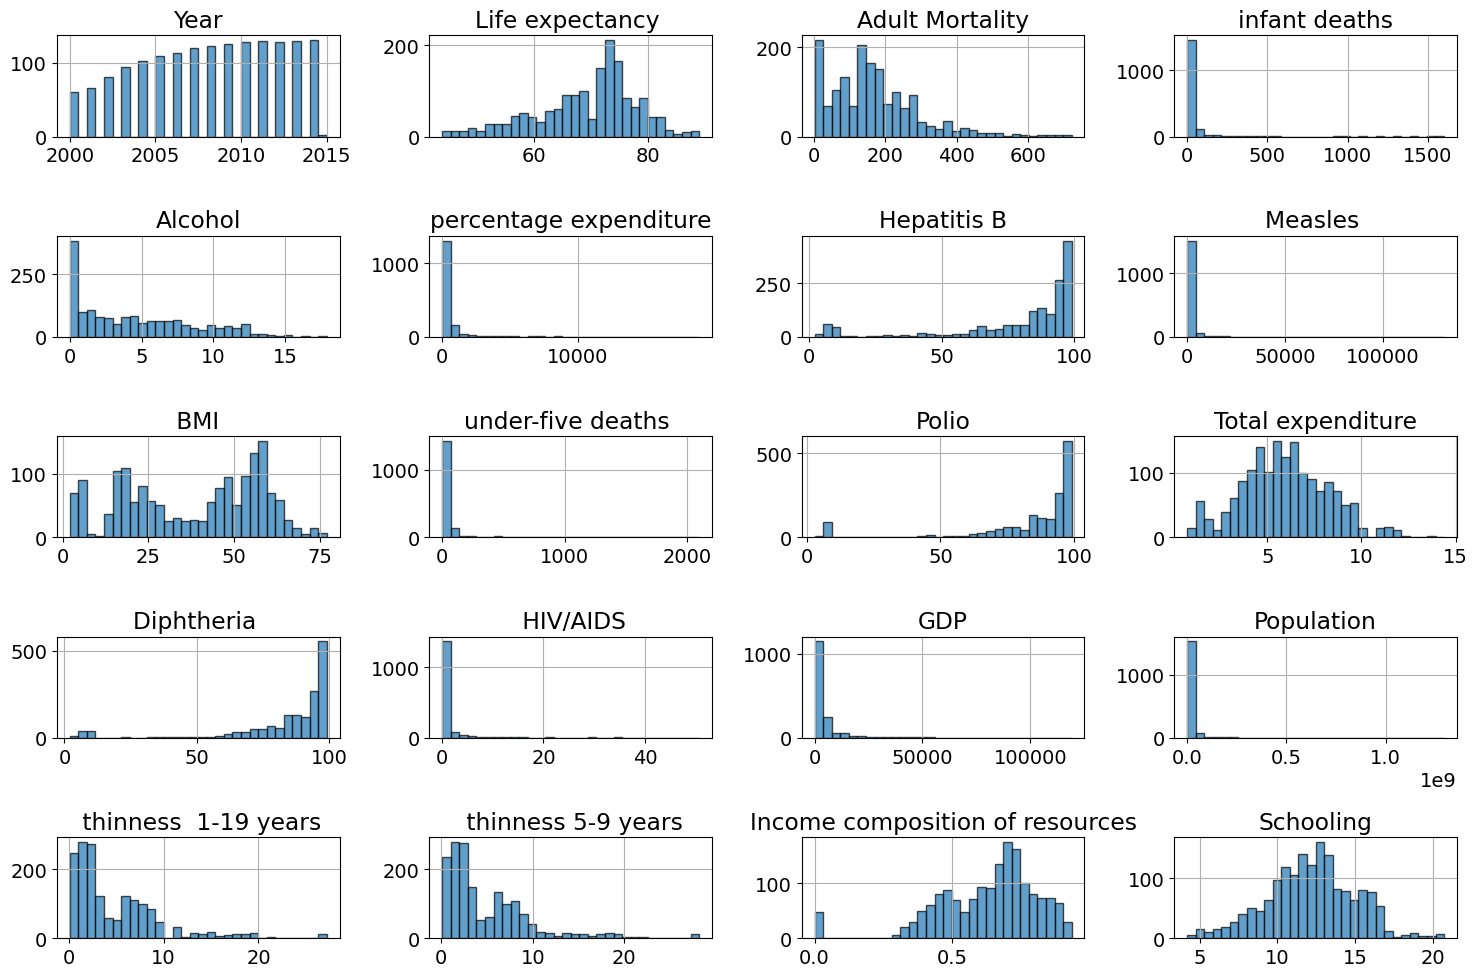

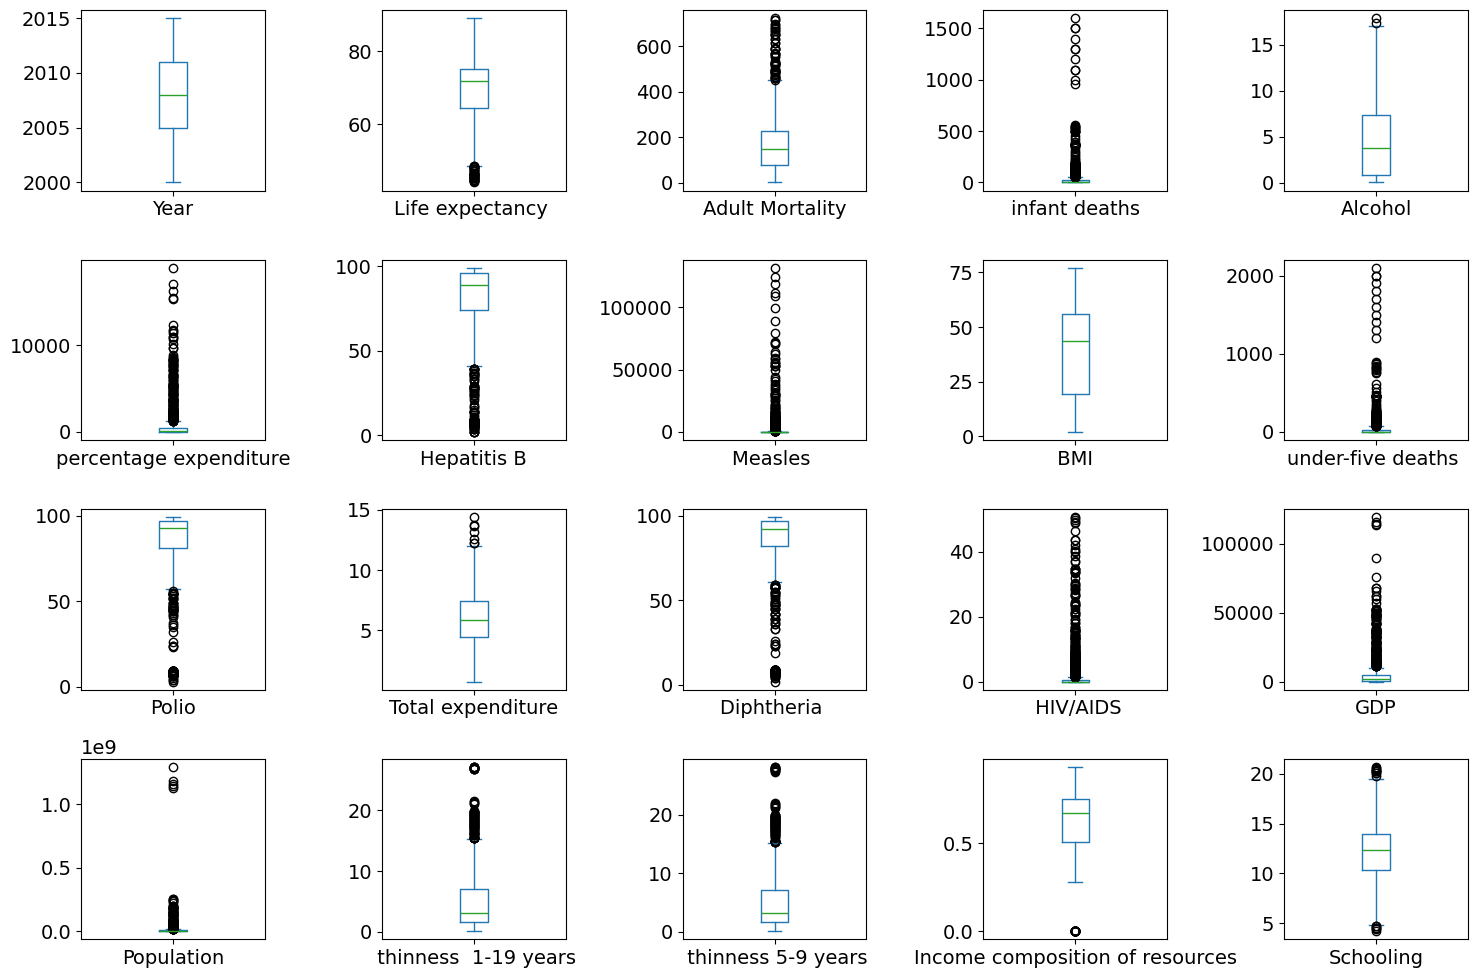

In [52]:
data.hist(figsize=(15, 10), bins=30, edgecolor='k', alpha=0.7)
plt.tight_layout()
plt.show()

data.plot(kind='box', subplots=True, layout=(4,5), figsize=(15,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Calculating and visualizing mean of data.

In [39]:
def plot_le_param(param_name, sort_type):
    le_by_param = data.groupby([param_name])["Life expectancy"]
    if sort_type == "index":
        le_by_param = le_by_param.mean().sort_index()
    else:
        le_by_param = le_by_param.mean().sort_values()
    plt.bar(le_by_param.index, le_by_param)
    plt.xlabel(param_name)
    plt.ylabel("Mean life expectancy")
    plt.title(f"Mean life expectancy by {param_name}")


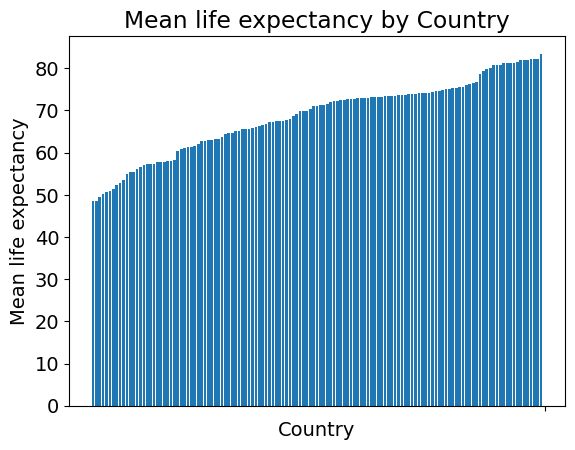

In [40]:
plot_le_param("Country", "values")
plt.xticks('')
plt.show()

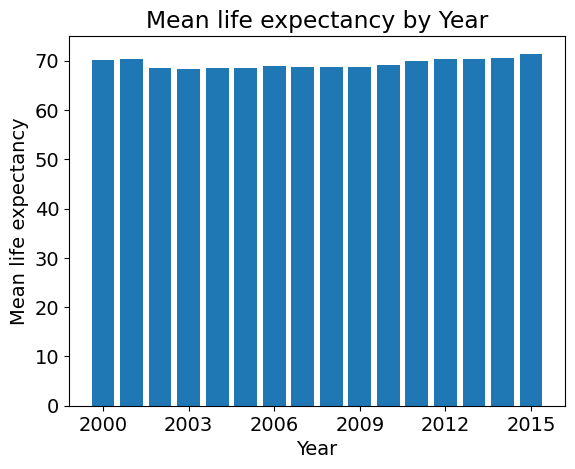

In [45]:
plot_le_param("Year", "index")
plt.xticks(np.arange(2000, 2016, 3))
plt.show()

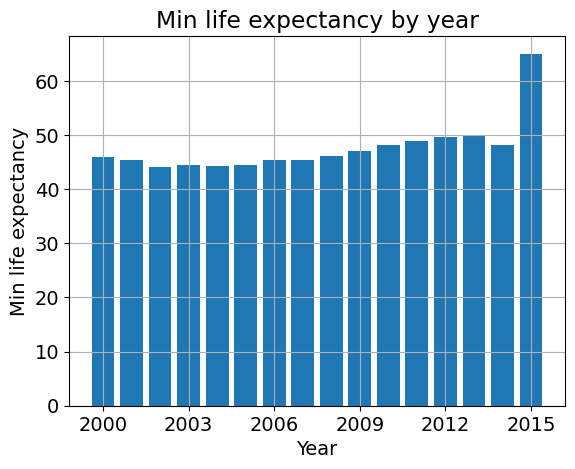

In [46]:
le_by_year = data.groupby(["Year"])["Life expectancy"]
le_by_year = le_by_year.min().sort_index()
plt.bar(le_by_year.index, le_by_year)
plt.xticks(np.arange(2000, 2016, 3))
plt.xlabel("Year")
plt.ylabel("Min life expectancy")
plt.title("Min life expectancy by year")
plt.grid()
plt.show();

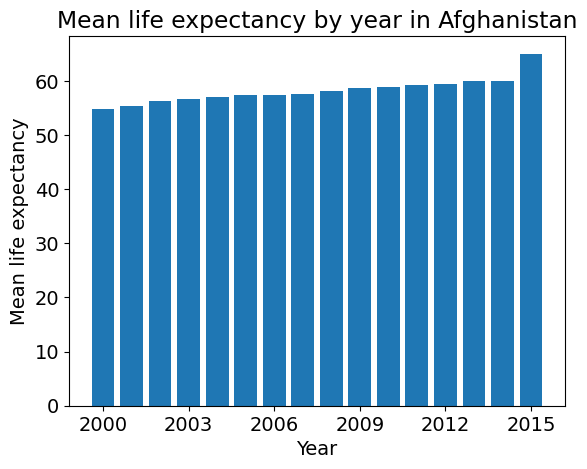

In [47]:
country = "Afghanistan"
le_by_year = data[data["Country"] == country].groupby(["Year"])["Life expectancy"]
le_by_year = le_by_year.mean().sort_index()
plt.bar(le_by_year.index, le_by_year)
plt.xticks(np.arange(2000, 2016, 3))
plt.xlabel("Year")
plt.ylabel("Mean life expectancy")
plt.title("Mean life expectancy by year in Afghanistan")
plt.show();

Correlation comparison.

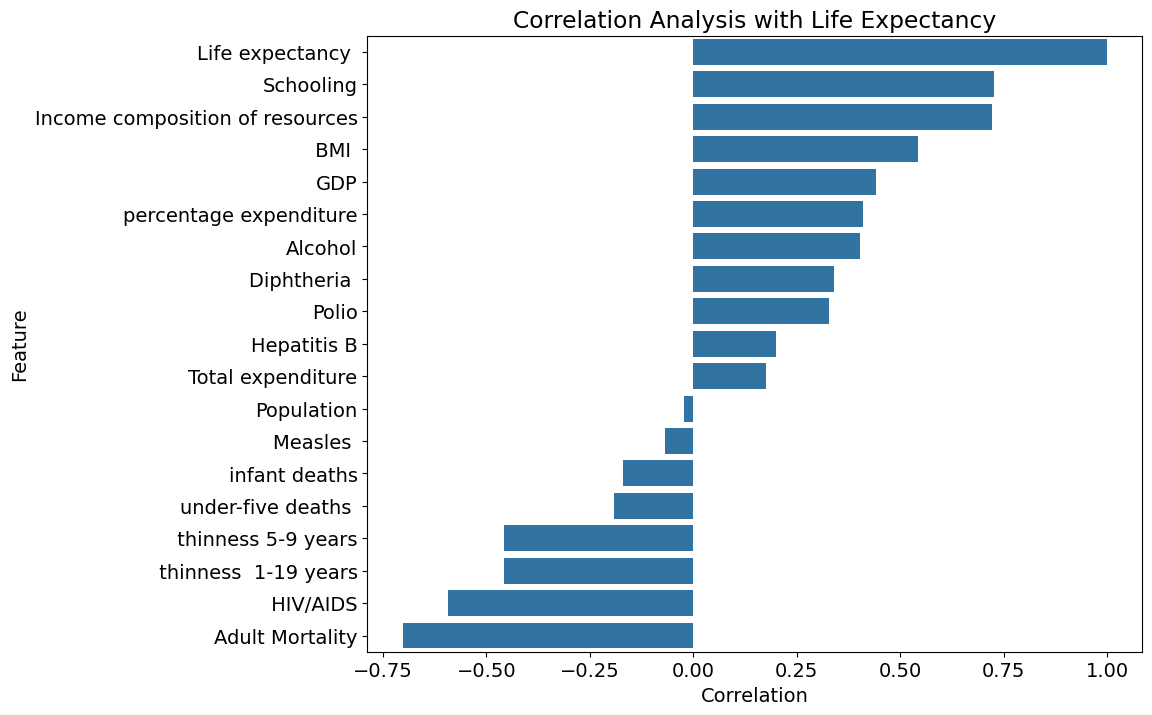

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings and set display options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rc('font', size=14)

# Update the file path to the location where your CSV file is stored
file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Ensure you are selecting numeric columns only and exclude non-numeric ones
num_cols = data.select_dtypes(include=[np.number]).columns.difference(["Year"])

# Calculate correlation with life expectancy
life_expectancy_corr = data[num_cols].corr()['Life expectancy '].sort_values(ascending=False)

# Plot the correlation bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=life_expectancy_corr, y=life_expectancy_corr.index)
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation Analysis with Life Expectancy')
plt.show()


Pairwise Relationships

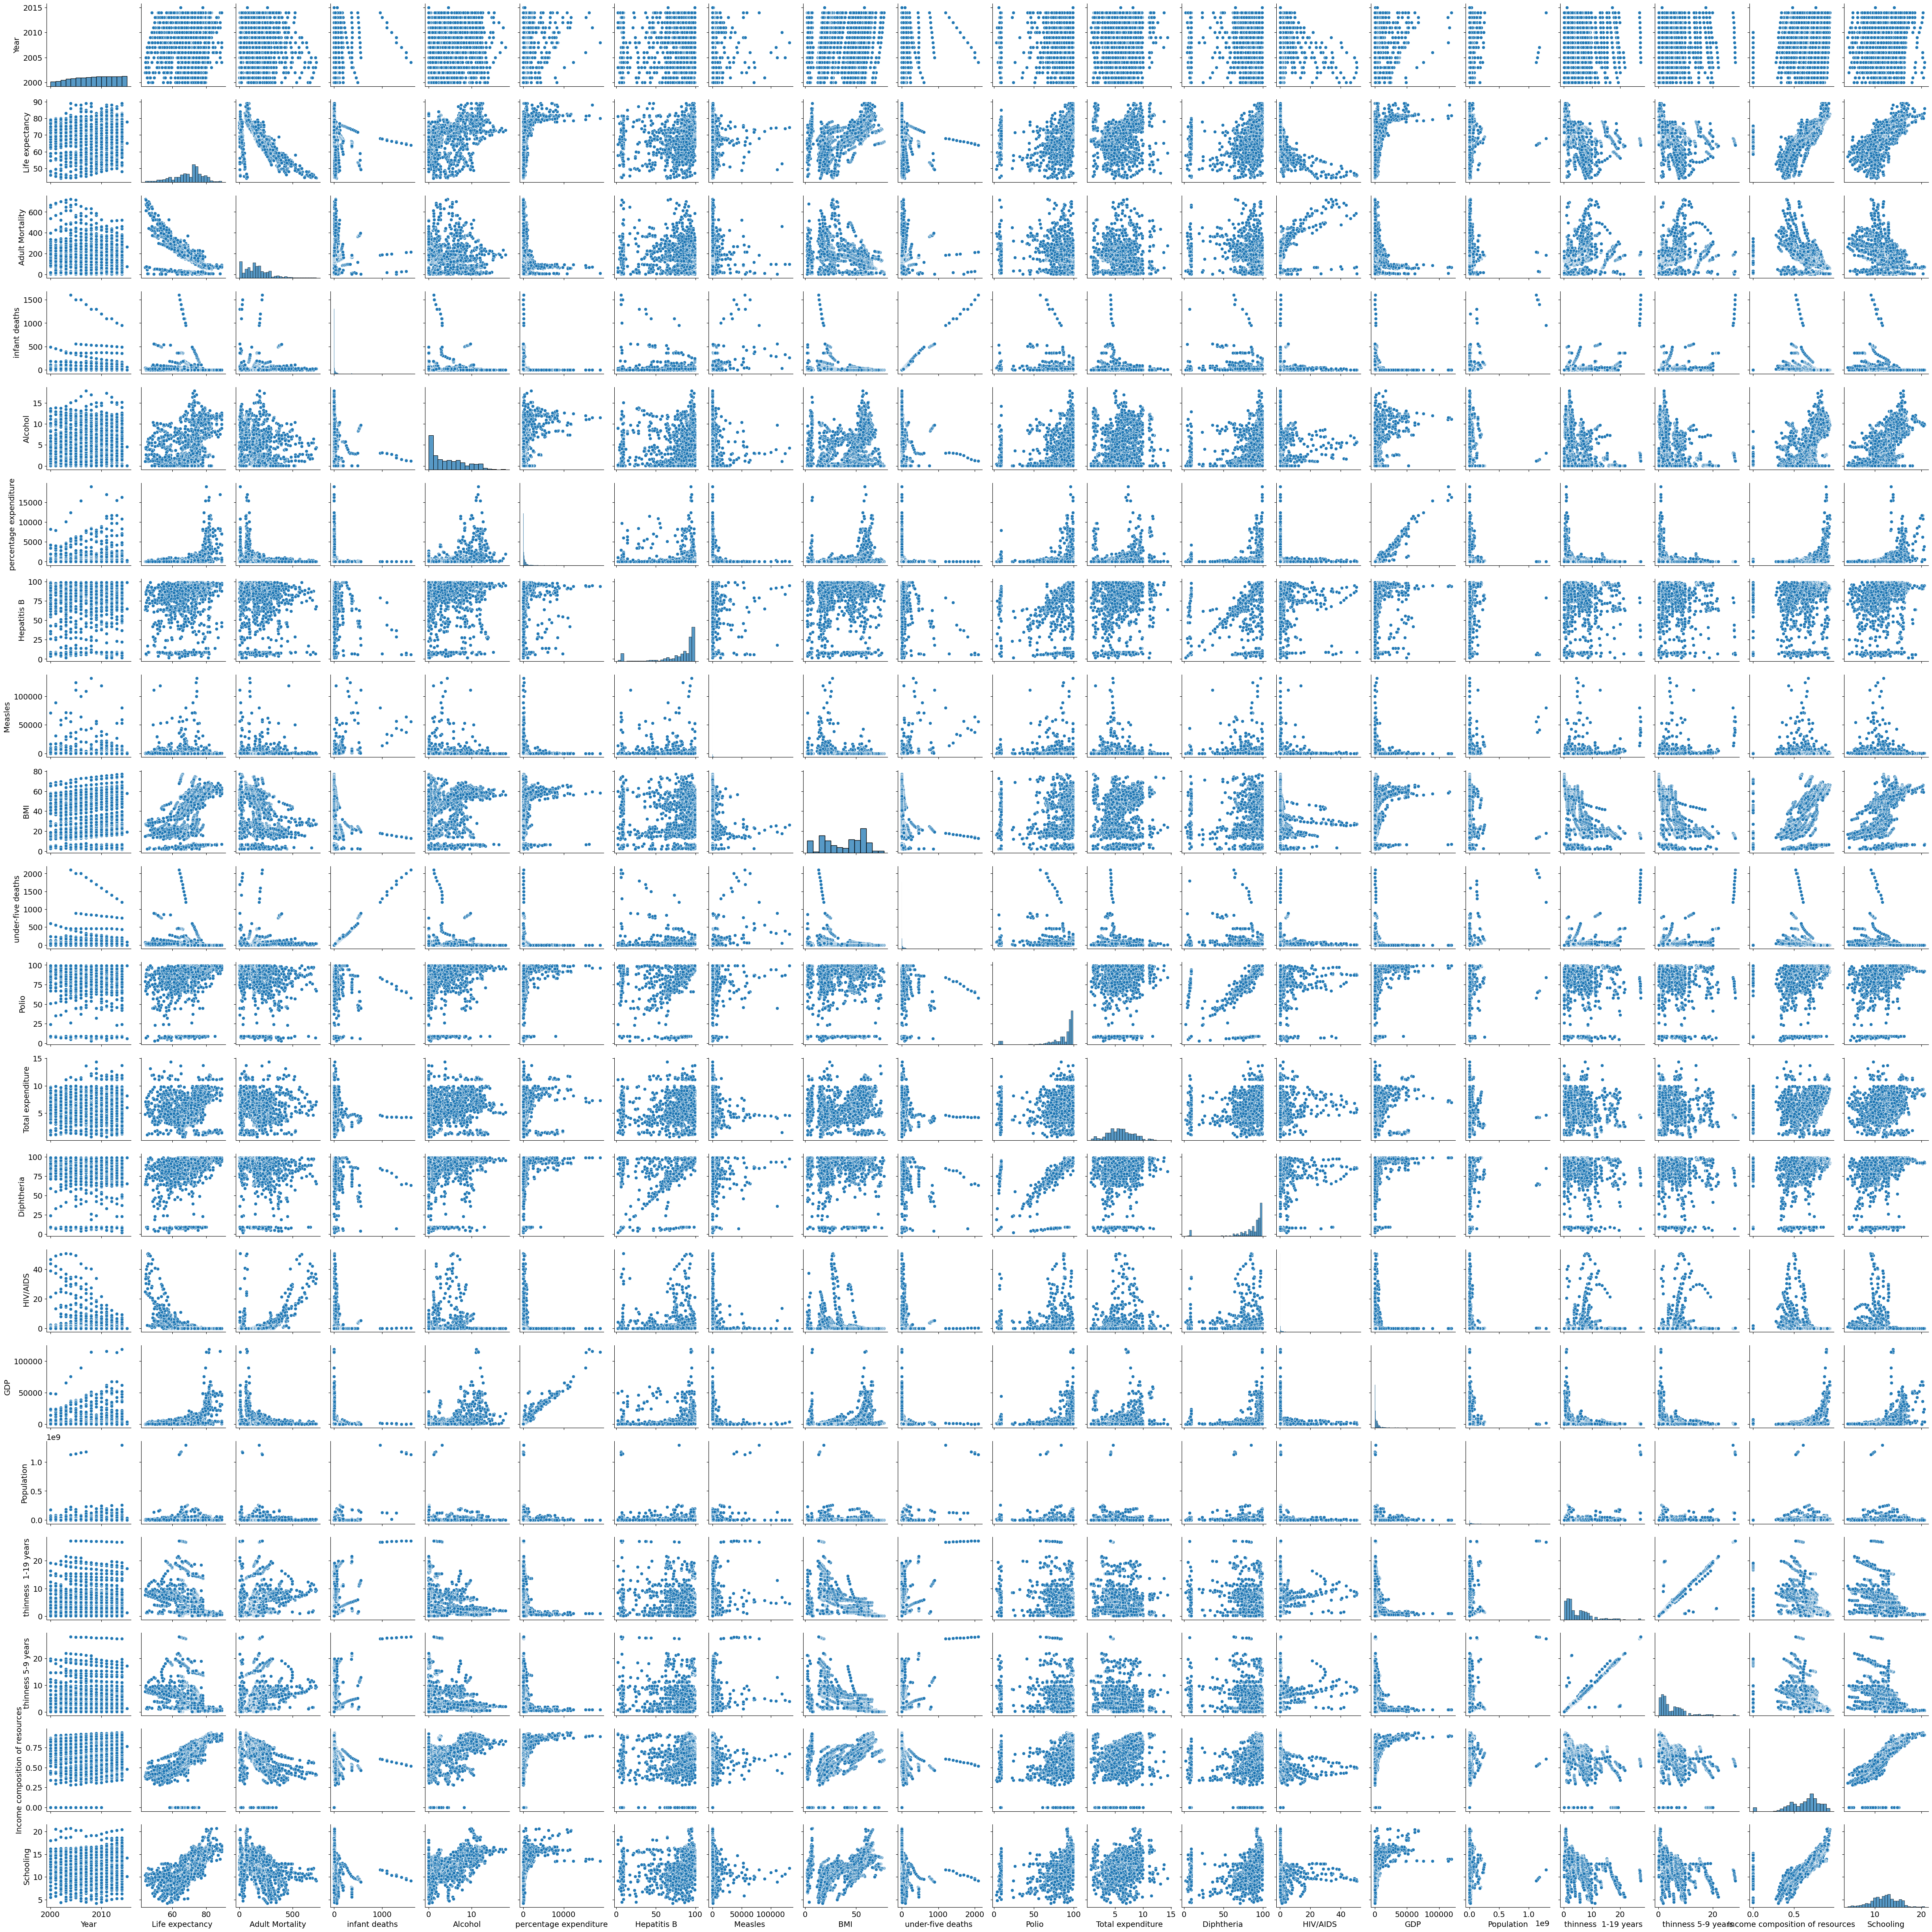

In [53]:
sns.pairplot(data)
plt.show()

Correlation Heatmap

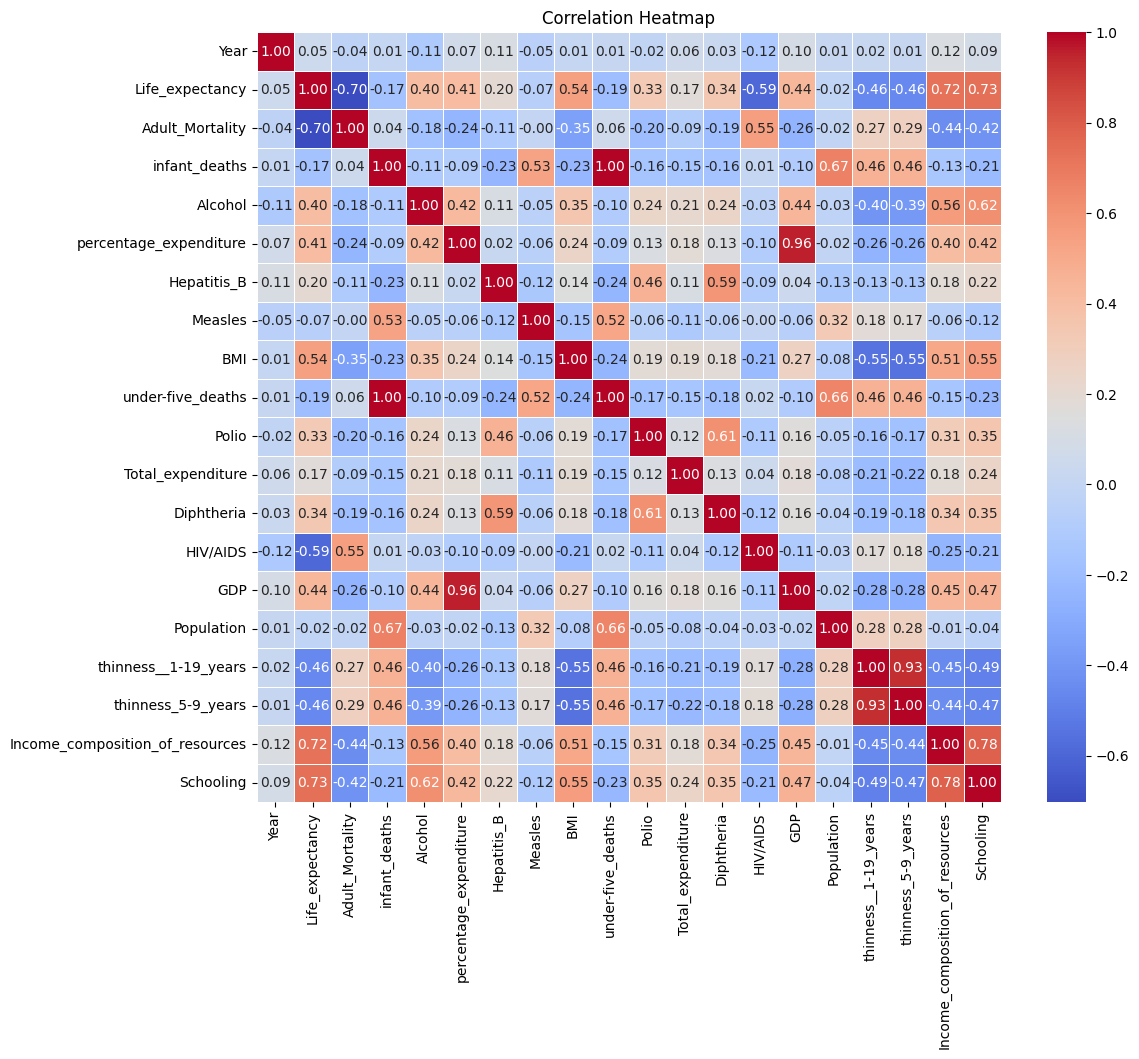

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings and set display options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rc('font', size=10)

# Update the file path to the location where your CSV file is stored
file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Ensure the column names are formatted correctly
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Select numeric columns only
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix for numeric columns only
correlation_matrix = data[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Categorical Features Analysis

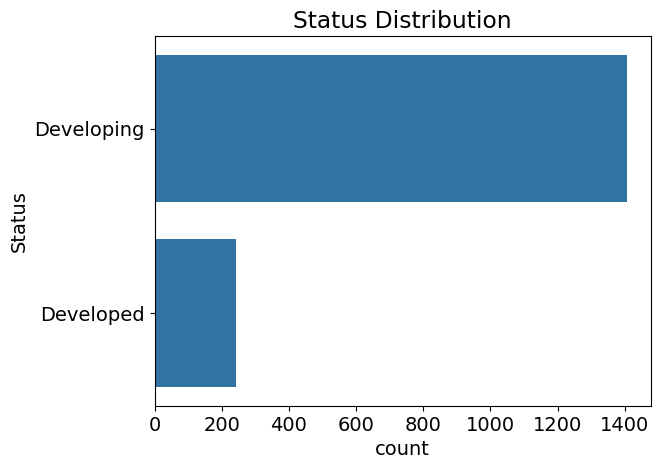

In [56]:
sns.countplot(data['Status'])
plt.title('Status Distribution')
plt.show()

Life Expectancy Trends

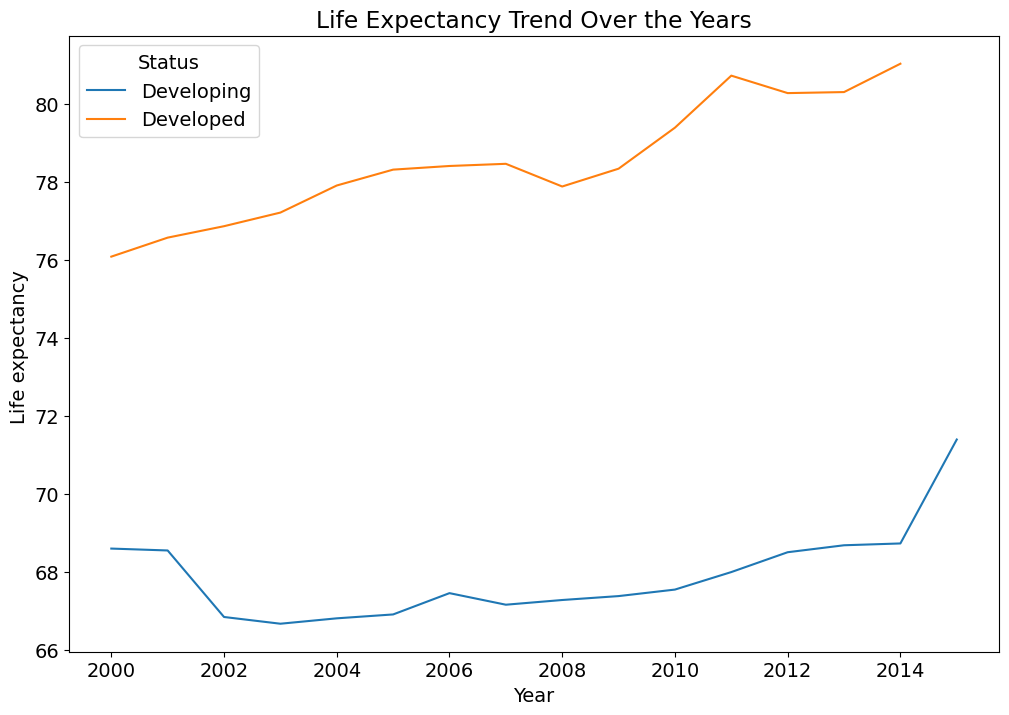

In [57]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='Year', y='Life expectancy ', hue='Status', ci=None)
plt.title('Life Expectancy Trend Over the Years')
plt.show()

Status
Developed     78.691736
Developing    67.687349
Name: Life expectancy , dtype: float64


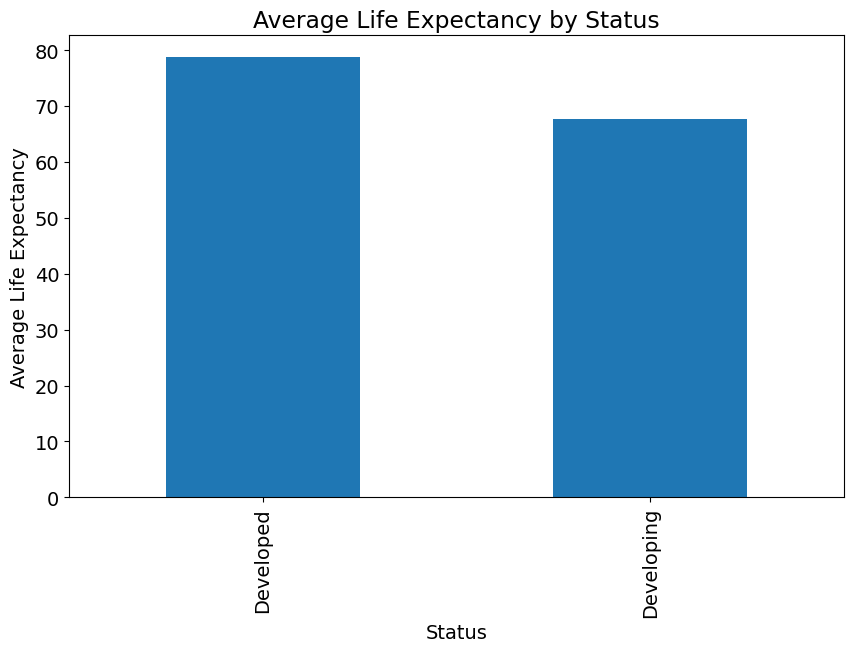

In [58]:
status_group = data.groupby('Status')['Life expectancy '].mean()
print(status_group)
status_group.plot(kind='bar', figsize=(10, 6))
plt.title('Average Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Average Life Expectancy')
plt.show()

Life Expectancy by Country

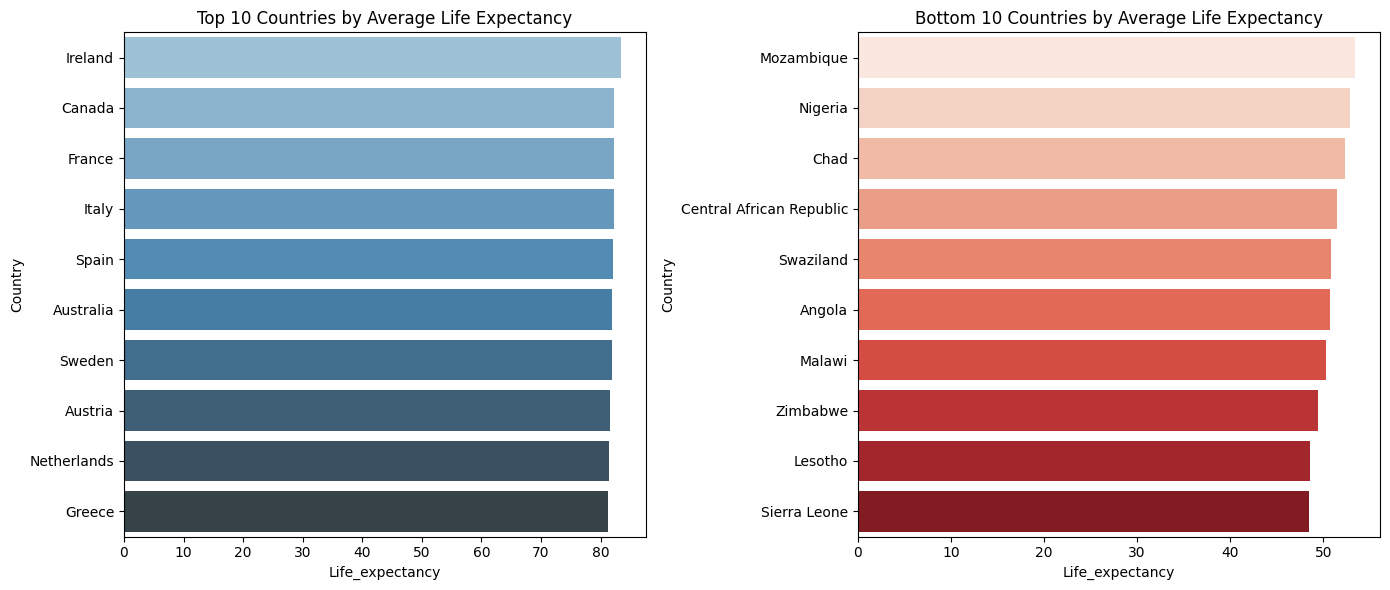

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Group by Country and calculate mean life expectancy
country_group = data.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=False)
top_countries = country_group.head(10)
bottom_countries = country_group.tail(10)

# Plotting
plt.figure(figsize=(14, 6))

# Top 10 countries
plt.subplot(1, 2, 1)
sns.barplot(x=top_countries, y=top_countries.index, palette="Blues_d")
plt.title('Top 10 Countries by Average Life Expectancy')

# Bottom 10 countries with red gradient
plt.subplot(1, 2, 2)
colors = sns.color_palette("Reds", n_colors=10)
sns.barplot(x=bottom_countries, y=bottom_countries.index, palette=colors)
plt.title('Bottom 10 Countries by Average Life Expectancy')

plt.tight_layout()
plt.show()


Life Expectancy and GDP/Income Analysis

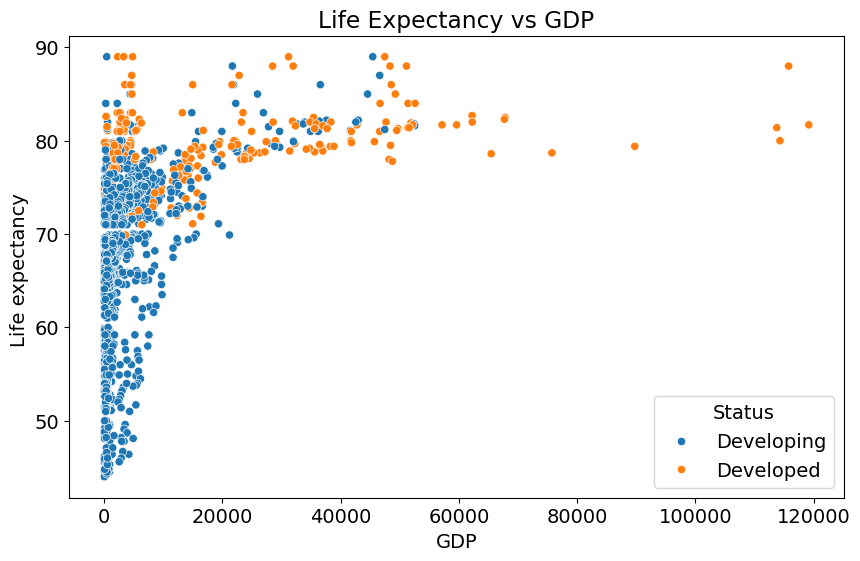

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GDP', y='Life expectancy ', hue='Status')
plt.title('Life Expectancy vs GDP')
plt.show()

# Machine Learning

Mean Absolute Error: 1.1049272727272765
R-squared: 0.9492187541053877


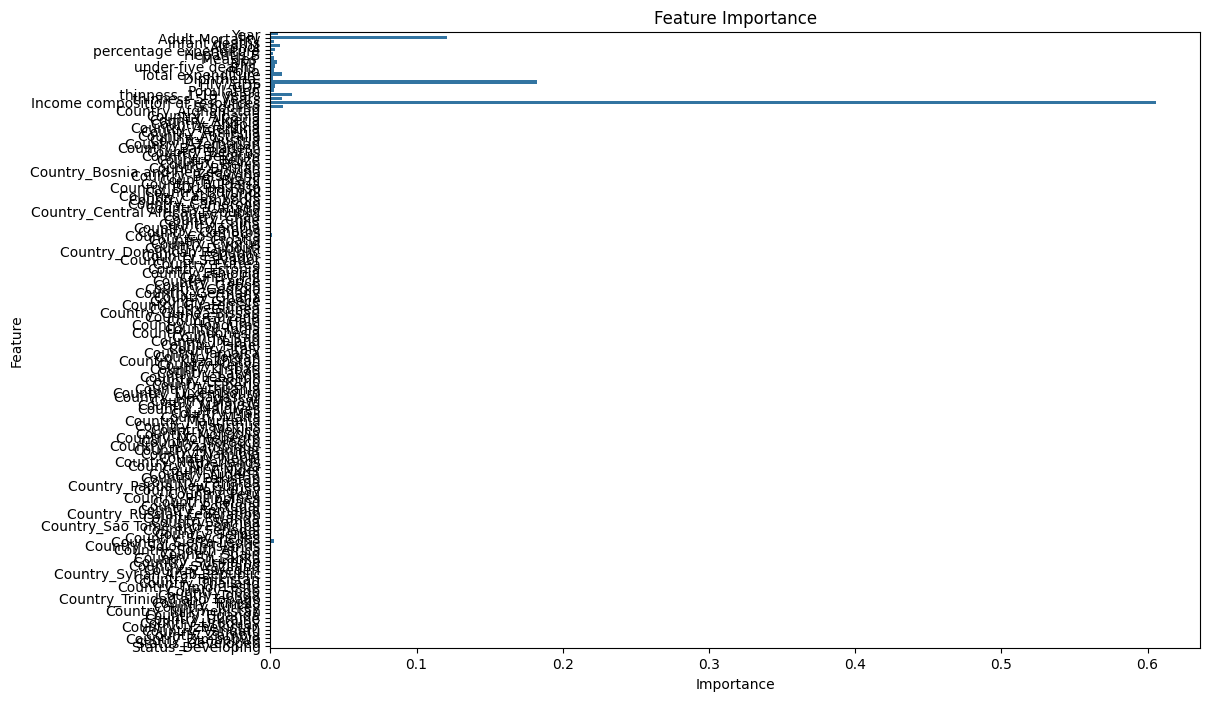

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'
data = pd.read_csv(file_path)

# Preprocessing: Handle categorical variables and scaling
X = data.drop(columns='Life expectancy ')
y = data['Life expectancy ']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_transformed, y_train)

# Evaluate the model
y_pred = model.predict(X_test_transformed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Feature importance
importances = model.feature_importances_
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



Limit it to the top 20 features

Mean Absolute Error: 1.1049272727272765
R-squared: 0.9492187541053877


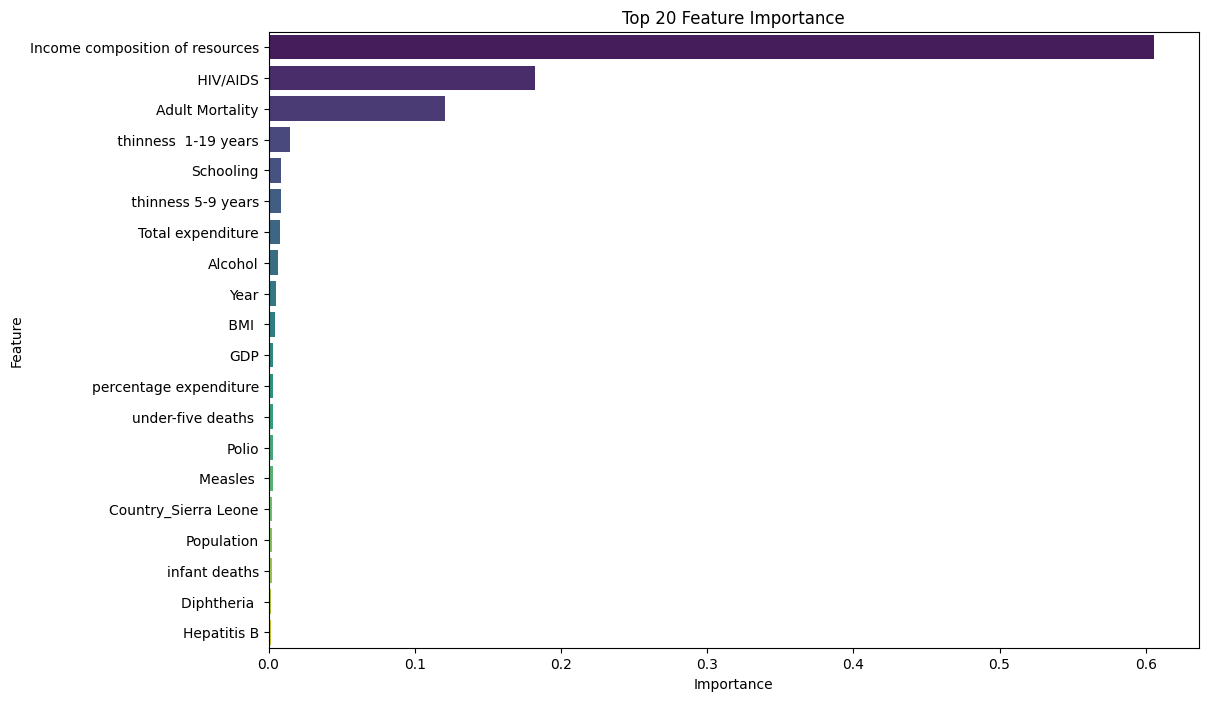

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\ksu09\OneDrive\Documents\Data Analytics Masters Work\capstone-young\Life_Expectancy_Data.csv'
data = pd.read_csv(file_path)

# Preprocessing: Handle categorical variables and scaling
X = data.drop(columns='Life expectancy ')
y = data['Life expectancy ']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_transformed, y_train)

# Evaluate the model
y_pred = model.predict(X_test_transformed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Feature importance
importances = model.feature_importances_
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance and select the top 20 features
top_20_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Trial Machine Learning Techniques

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_transformed)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')


Linear Regression Mean Squared Error: 3.89667099603858


In [82]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test_transformed)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f'Gradient Boosting Mean Squared Error: {mse_gbm}')


Gradient Boosting Mean Squared Error: 4.5563086301666


In [83]:
from sklearn.svm import SVR

# Train a Support Vector Machine model
svr_model = SVR()
svr_model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_transformed)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Support Vector Machine Mean Squared Error: {mse_svr}')


Support Vector Machine Mean Squared Error: 9.089222742549296


In [84]:
from sklearn.neural_network import MLPRegressor

# Train a Neural Network model
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_transformed)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network Mean Squared Error: {mse_nn}')


Neural Network Mean Squared Error: 16.57804543240628
